[Go to Section](#2)

In [4]:
import pandas as pd
data = pd.read_csv('adult.data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
              'marital_status', 'occupation', 'relationship', 'race', 'sex',
              'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [6]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 1. 年齡和收入的關係是甚麼？

In [8]:
age = data['age']
income = data['income']

In [9]:
age_income = pd.concat([age, income], axis=1)
age_income.columns = ['age', 'income']  # 可以這樣設定列名

In [10]:
# 我想要在 income 中找出有幾種收入的類別

age_income['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

<Axes: xlabel='income', ylabel='age'>

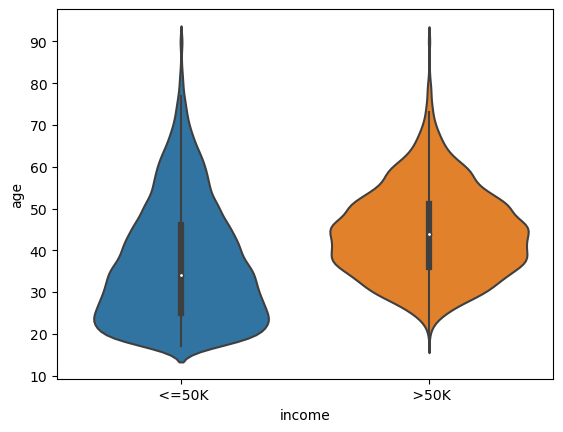

In [11]:
sns.violinplot(data=age_income, x="income", y="age")

## How many men and women (sex feature) are represented in this dataset?

In [12]:
sex_counts = data['sex'].value_counts()
sex_counts

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

<a id="2"></a>

# 2. 哪些工作類型更容易賺到高薪？哪些工作類型更容易賺到低薪？


In [15]:
workclass = data['workclass']
workclass.head()

0            State-gov
1     Self-emp-not-inc
2              Private
3              Private
4              Private
Name: workclass, dtype: object

In [16]:
workclass_income = pd.concat([workclass, income], axis=1)
workclass_income.columns = ['workclass', 'income']  # 可以這樣設定列名

In [17]:
workclass_income.head()

,workclass,income
0,State-gov,<=50K
1,Self-emp-not-inc,<=50K
2,Private,<=50K
3,Private,<=50K
4,Private,<=50K


In [18]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [19]:
income_distribution_counts = data.groupby('workclass')['income'].value_counts().unstack()
income_distribution_counts

income,<=50K,>50K
workclass,,
?,1645.0,191.0
Federal-gov,589.0,371.0
Local-gov,1476.0,617.0
Never-worked,7.0,NaN
Private,17733.0,4963.0
Self-emp-inc,494.0,622.0
Self-emp-not-inc,1817.0,724.0
State-gov,945.0,353.0
Without-pay,14.0,NaN


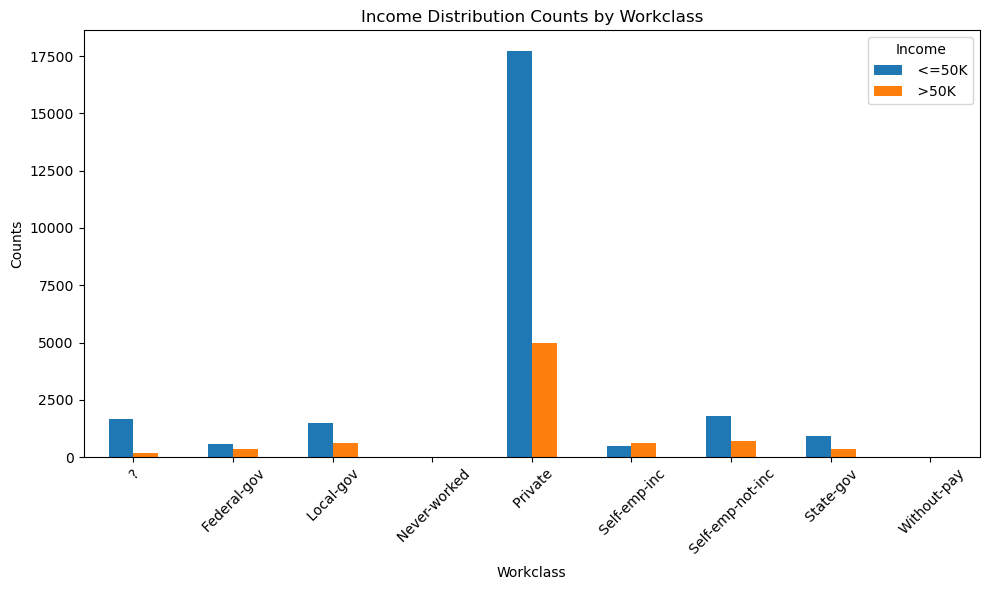

In [20]:
import matplotlib.pyplot as plt

# 繪製柱狀圖
income_distribution_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Income Distribution Counts by Workclass')  # 設定圖表標題
plt.xlabel('Workclass')  # 設定X軸標籤
plt.ylabel('Counts')  # 設定Y軸標籤
plt.xticks(rotation=45)  # 旋轉X軸標籤，以便更好地展示
plt.legend(title='Income')  # 設定圖例標題
plt.tight_layout()  # 自動調整子圖參數, 使之填充整個圖像區域
plt.show()

# 3.工作時間是否影響收入？

<Axes: xlabel='income', ylabel='hours_per_week'>

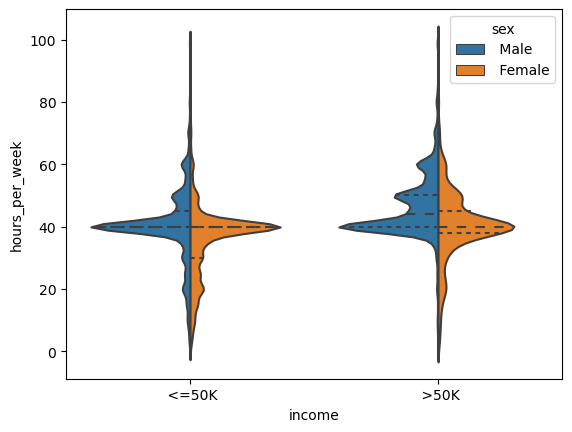

In [21]:
sns.violinplot(data=data, x="income", y="hours_per_week", hue="sex", split=True, inner="quart")